# Introduction 

### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Understanding the column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Do note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $


# Dataset exploitation


## Explanations

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
data = pd.read_csv('World_Happiness_2015_2017.csv')

# We then use data.head() to see the first 5 rows of data
data.head()

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Year  
0     0.29678            2.51738  2015  
1     0.43630            2.70201  2015  
2     0.34139            2.49204  2015  
3     0.34699            2.46531  2015  
4     0.45811            2.45176  2015

In [3]:
# Then what I do next is look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [4]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

### Looking into null values. There are numerous way you can deal with null, NaN or unknown values.
- Omitting rows with null/NaN values
  * This helps our output to be more robust and accurate
  * However this should only be done when we have sufficient data. If we have more than 50% NaN values, we may not be able to omit the affected rows.
- Replace these NaN and null values with mean or median
 * This saves us the worry for loss of information
 * This does increase our data variance and bias

To identify null values, we use **data.isnull().sum()**
- isnull() returns boolean (True or False). Is this value null? Yes or No?
- sum() calculate the number of True
- For this practice I have personally picked one dataset with no null value. So you should see 0 for each column.

In [5]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

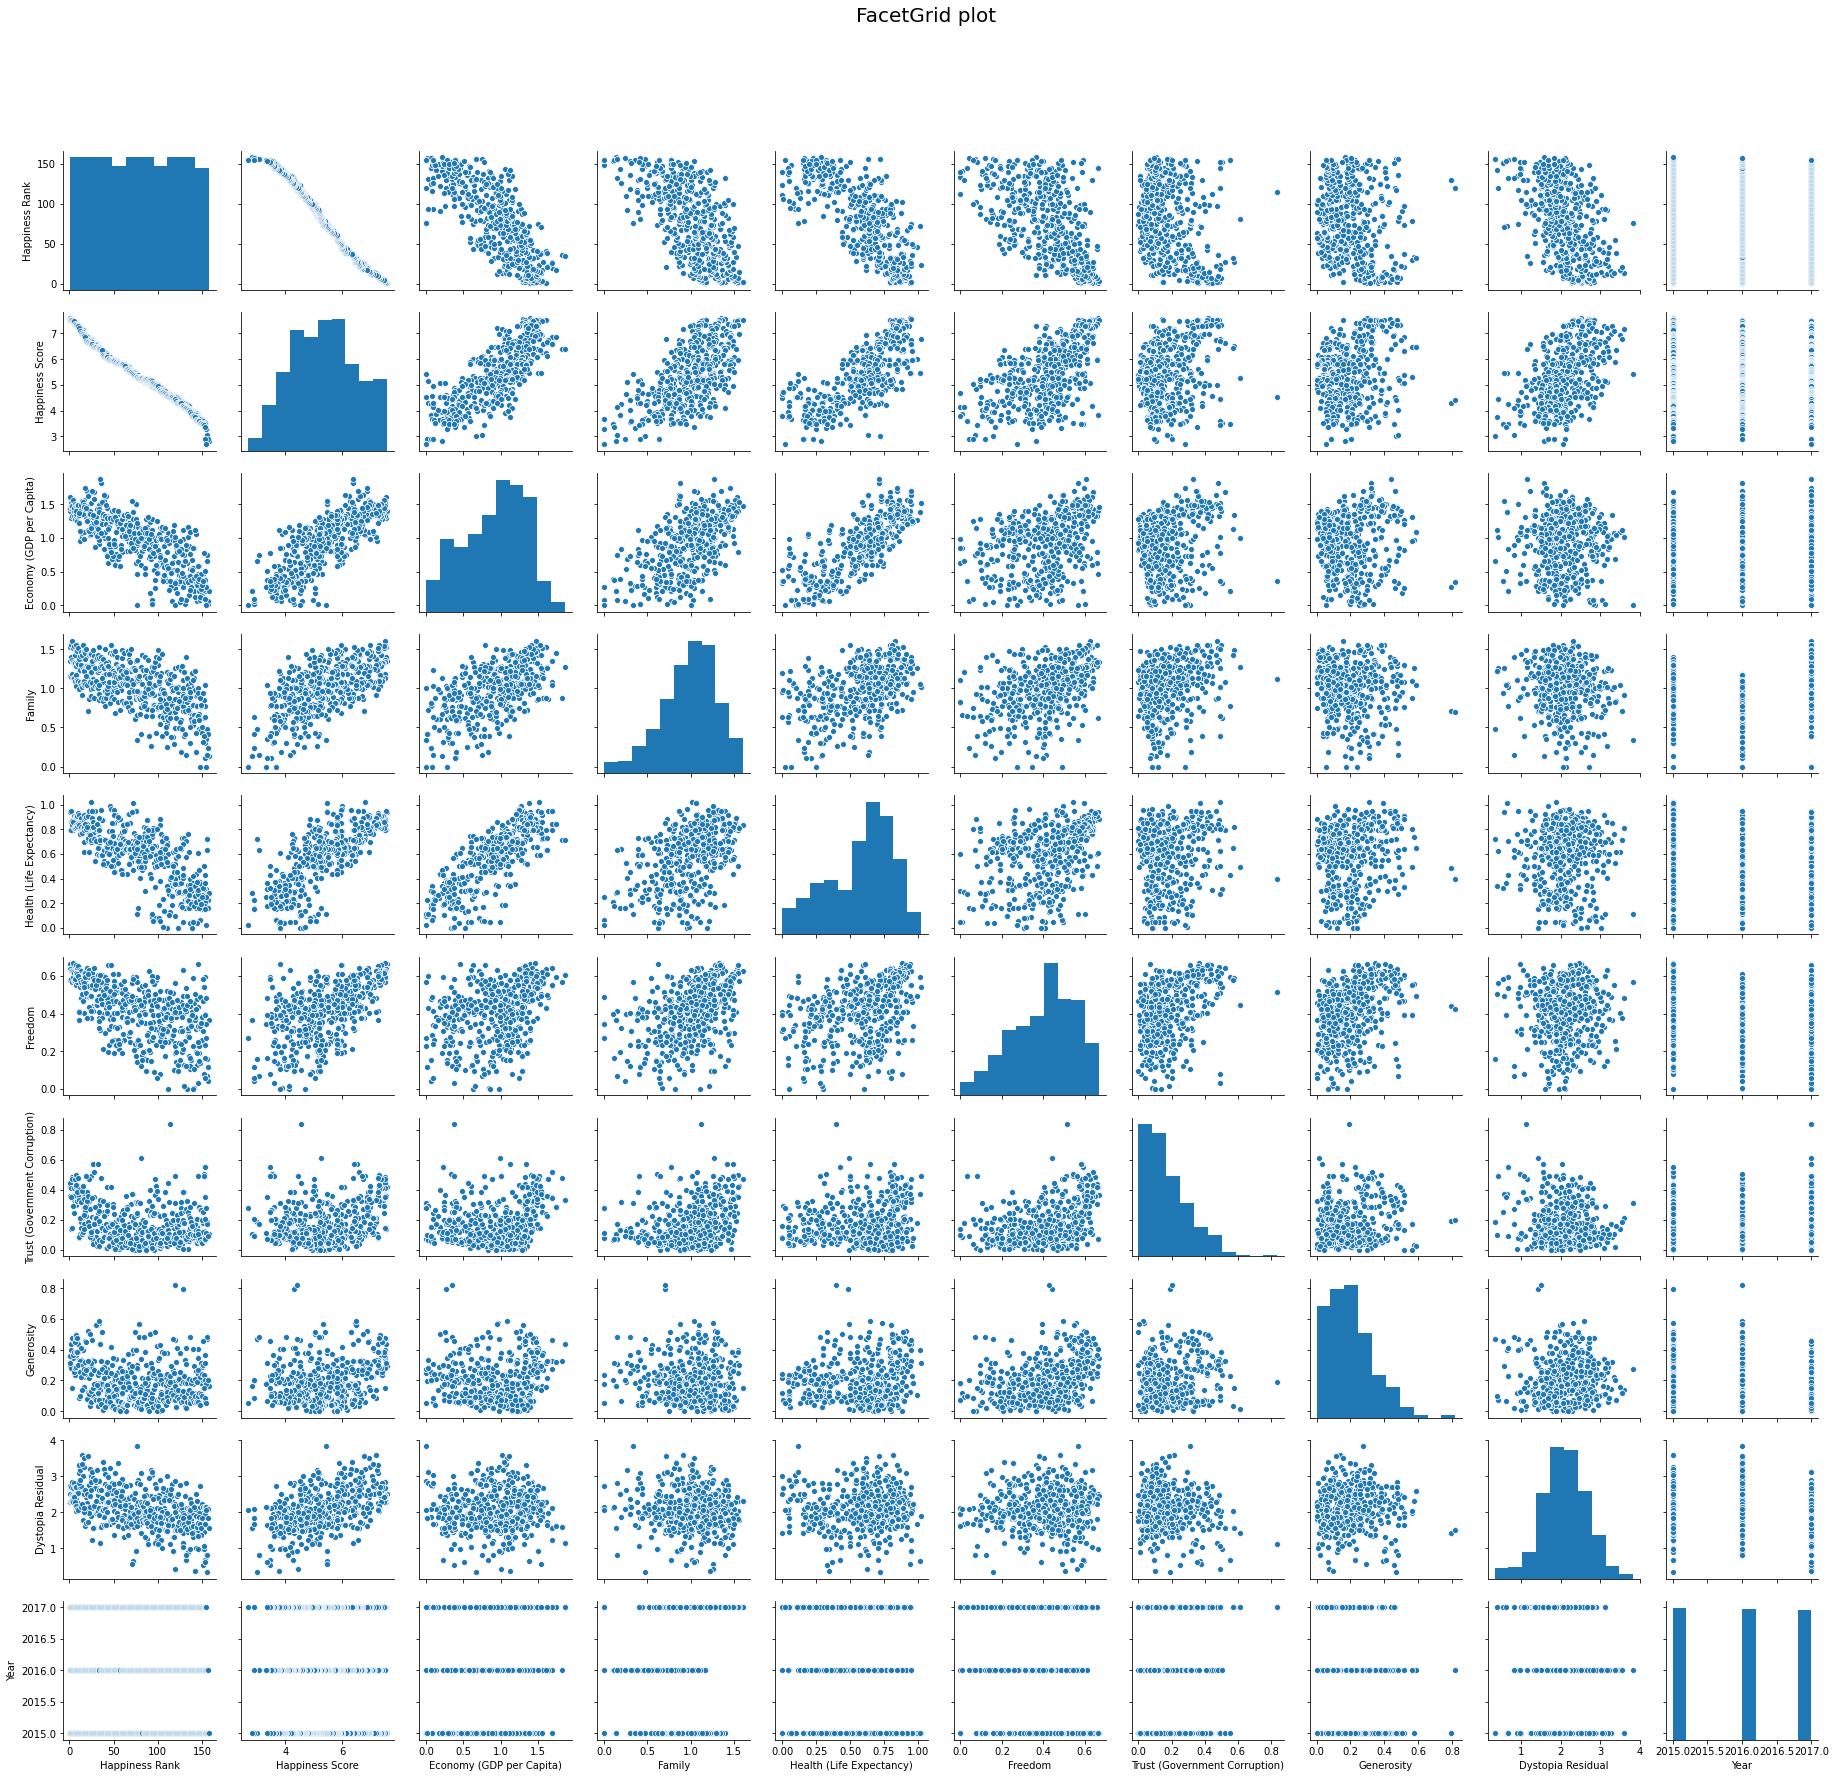

In [6]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

### What do we see here?

We see two types of plot. 
- Histograms
    * Take some time to look at the x axis and y axis of the histogram. There are the same! This shows the distribution of each attribute.
- Scatter plot
    * This shows the relationship between 2 attributes. We can see a strong linear correlation between Happiness Rank and Happiness Score. That is because the rank is determined by the score. 

## Correlation between Happiness score and economic 

### What I plan to do:
- Assign the required attribute as a list and assign that to a variable
- Use .corr() to find correlation. 
 * If you look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), you will notice the default test used is pearson. Besides Pearson distribution, you get to choose between Kendall and Spearman.

### Pearson distribution
Pearson's correlation is a measure of the linear relationship between two continuous random variables. A perfect positive linear correlation will be 1. If value on x increases, value of y increases. A perfect negative correlation is -1. If X increases, Y decrease. Before we run any stats model we need to look into the assumptions.
#### Assumptions for Pearson
- Each variable needs to be continuous and not discrete. Continuous values have decimals and has a scale. Things like weight and height are continuous (10.02 KG, 1.002 cm). Decrete are fix numbers. Things like I saw 2 eggs on the table or number of visits to the doctor (1,2,3,etc). No such thing as I saw 3.42 eggs on the table or I have visited the doctor 4.3 times this year.
- Next is related pair. Related pairs refers to the pairs of variables. Each participant or observation should have a pair of values. So if the correlation was between GPA and SAT score, then each observation used should have both a GPA and a SAT value. Using this example I can only include Peter, Tom and Sam into the sample if they have both GPA and SAT score. If Sam only has GPA, I can't use Pearson.
- No outliers. Absence of outliers refers to not having outliers in either variable. Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.  Typically, an outlier is defined as a value that is 3.29 standard deviations from the mean,or a standardized value of less than ±3.29.
- Linearity and homoscedasticity refer to the shape of the values formed by the scatterplot. For linearity, a “straight line” relationship between the variable should be formed.  If a line were to be drawn between all the dots going from left to right, the line should be straight and not curved. Homoscedasticity refers to the distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met. 

Credit to [S.SWAIN](https://www.researchgate.net/profile/S_Swain2) from Researchgate that did a wonderful explanation! 

For this practice, we will just work with Pearson.

In [7]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

Happiness Score  Economy (GDP per Capita)
Happiness Score                   1.00000                   0.78545
Economy (GDP per Capita)          0.78545                   1.00000

### What do we see here?
- Before we interpret the result we need to ask ourselves how high should the correlation coefficient be to be significant. How close to -1 or 1? For this purpose let me introduce you to $R^2$!
- Why is $R^2$ better than R?
 * Interpretation is easy.
 * For this exercise we realise that the $R^2$ value is 0.617. This tells us that 61.7% of variation can be explained by the relationship between happiness score and Economy. 


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

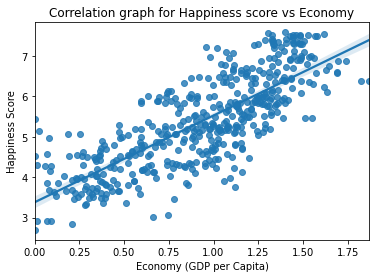

In [8]:
sns.regplot(data = econ_corr, x = 'Economy (GDP per Capita)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Economy")

# Other criteria

## Global

In [9]:
attributes_happiness = ['Happiness Score','Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

attributes_corr = data[attributes_happiness]

r = attributes_corr.corr()
attributes_corr.corr()


Happiness Score    Family  \
Happiness Score                       1.000000  0.636532   
Family                                0.636532  1.000000   
Health (Life Expectancy)              0.748040  0.486383   
Freedom                               0.560353  0.425377   
Trust (Government Corruption)         0.282130  0.289768   
Generosity                            0.221684 -0.083528   
Dystopia Residual                     0.489747 -0.081537   

                               Health (Life Expectancy)   Freedom  \
Happiness Score                                0.748040  0.560353   
Family                                         0.486383  0.425377   
Health (Life Expectancy)                       1.000000  0.359566   
Freedom                                        0.359566  1.000000   
Trust (Government Corruption)                  0.135961  0.405894   
Generosity                                     0.161436  0.346951   
Dystopia Residual                              0.057674  0.038422   

                               Trust (Government Corruption)  Generosity  \
Happiness Score                                     0.282130    0.221684   
Family                                              0.289768   -0.083528   
Health (Life Expectancy)                            0.135961    0.161436   
Freedom                                             0.405894    0.346951   
Trust (Government Corruption)                       1.000000    0.084390   
Generosity                                          0.084390    1.000000   
Dystopia Residual                                  -0.162386    0.047765   

                               Dystopia Residual  
Happiness Score                         0.489747  
Family                                 -0.081537  
Health (Life Expectancy)                0.057674  
Freedom                                 0.038422  
Trust (Government Corruption)          -0.162386  
Generosity                              0.047765  
Dystopia Residual                       1.000000

In [10]:
rn = r.iloc[:,0]
print('Correlation (R) for Hapinesss Score are: ')
rn

Correlation (R) for Hapinesss Score are: 


Happiness Score                  1.000000
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Trust (Government Corruption)    0.282130
Generosity                       0.221684
Dystopia Residual                0.489747
Name: Happiness Score, dtype: float64

In [11]:
r2 = r.iloc[:,0]**2
print('The R-Squared Values are: ')
r2

The R-Squared Values are: 


Happiness Score                  1.000000
Family                           0.405173
Health (Life Expectancy)         0.559564
Freedom                          0.313996
Trust (Government Corruption)    0.079597
Generosity                       0.049144
Dystopia Residual                0.239852
Name: Happiness Score, dtype: float64

## Correlation between Happiness score and Family




In [12]:
fam_happiness = ['Happiness Score','Family']
fam_corr = data[fam_happiness]
fam_corr.corr()

Happiness Score    Family
Happiness Score         1.000000  0.636532
Family                  0.636532  1.000000

In [13]:
r_fam = data['Happiness Score'].corr(data['Family'])
print(f'R is equal to {r_fam}')
print(f'Thus R² is equal to {r_fam*r_fam}')

R is equal to 0.6365319620015424
Thus R² is equal to 0.405172938649533


### What do we see here ?

The $R^2$ value between Happiness Score and `Family` is .41. Meaning 41% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.63.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Family')

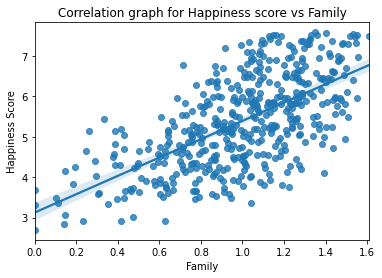

In [14]:
sns.regplot(data = fam_corr, x = 'Family', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Family")

## Correlation between Happiness score and Health

In [15]:
health_happiness = ['Happiness Score','Health (Life Expectancy)']
health_corr = data[health_happiness]
health_corr.corr()

Happiness Score  Health (Life Expectancy)
Happiness Score                   1.00000                   0.74804
Health (Life Expectancy)          0.74804                   1.00000

In [16]:
r_health = data['Happiness Score'].corr(data['Health (Life Expectancy)'])
print(f'R is equal to {r_health}')
print(f'Thus R² is equal to {r_health*r_health}')

R is equal to 0.7480403741076488
Thus R² is equal to 0.5595644012951112


### What do we see here ?

The $R^2$ value between Happiness Score and `Health` is .56. Meaning 56% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.75.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Health')

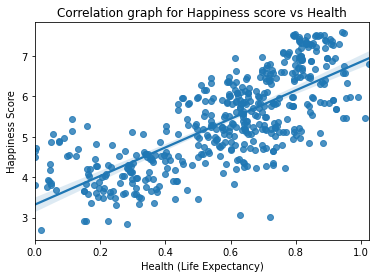

In [17]:
sns.regplot(data = health_corr, x = 'Health (Life Expectancy)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Health")

## Correlation between Happiness score and Freedom

In [18]:
free_happiness = ['Happiness Score', 'Freedom']
free_corr = data[free_happiness]
free_corr.corr()

Happiness Score   Freedom
Happiness Score         1.000000  0.560353
Freedom                 0.560353  1.000000

In [19]:
r_free = data['Happiness Score'].corr(data['Freedom'])
print(f'R is equal to {r_free}')
print(f'Thus R² is equal to {r_free*r_free}')


R is equal to 0.5603533892994486
Thus R² is equal to 0.31399592089937933


### What do we see here ?

The $R^2$ value between Happiness Score and `Freedom` is .31. Meaning 31% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.56.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Freedom')

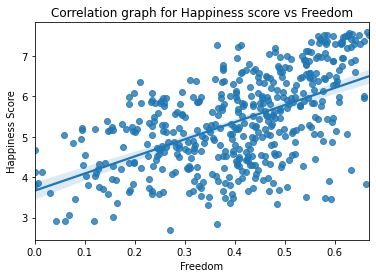

In [20]:
sns.regplot(data = free_corr, x = 'Freedom', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Freedom")

## Correlation between Happiness score and Trust (Government corruption)

In [21]:
trust_happiness = ['Happiness Score','Trust (Government Corruption)']
trust_corr = data[trust_happiness]
trust_corr.corr()

Happiness Score  Trust (Government Corruption)
Happiness Score                        1.00000                        0.28213
Trust (Government Corruption)          0.28213                        1.00000

In [22]:
r_trust = data['Happiness Score'].corr(data['Trust (Government Corruption)'])
print(f'R is equal to {r_trust}')
print(f'Thus R² is equal to {r_trust*r_trust}')


R is equal to 0.28212964747712693
Thus R² is equal to 0.07959713798556792


### What do we see here ?

The $R^2$ value between Happiness Score and `Trust` is .08. Meaning 8% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.28.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Trust')

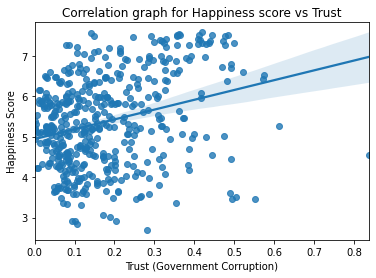

In [23]:
sns.regplot(data = trust_corr, x = 'Trust (Government Corruption)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Trust")

## Correlation between Happiness score and Generosity

In [24]:
gen_happiness = ['Happiness Score','Generosity']
gen_corr = data[gen_happiness]
gen_corr.corr()

Happiness Score  Generosity
Happiness Score         1.000000    0.221684
Generosity              0.221684    1.000000

In [25]:
r_gen = data['Happiness Score'].corr(data['Generosity'])
print(f'R is equal to {r_gen}')
print(f'Thus R² is equal to {r_gen*r_gen}')

R is equal to 0.22168363403460306
Thus R² is equal to 0.049143633598787824


### What do we see here ?

The $R^2$ value between Happiness Score and `Generosity` is .05. Meaning 5% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.22.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Generosity')

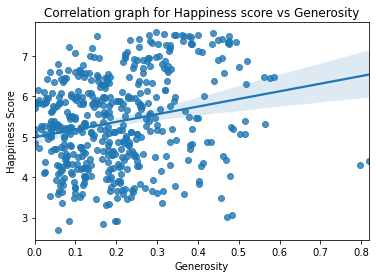

In [26]:
sns.regplot(data = gen_corr, x = 'Generosity', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Generosity")

## Correlation between Happiness score and Dystopia residual

In [27]:
dys_happiness = ['Happiness Score','Dystopia Residual']
dys_corr = data[dys_happiness]
dys_corr.corr()

Happiness Score  Dystopia Residual
Happiness Score           1.000000           0.489747
Dystopia Residual         0.489747           1.000000

In [28]:
r_dys = data['Happiness Score'].corr(data['Dystopia Residual'])
print(f'R is equal to {r_dys}')
print(f'Thus R² is equal to {r_dys*r_dys}')


R is equal to 0.4897471845676658
Thus R² is equal to 0.23985230479195532


### What do we see here ?

The $R^2$ value between Happiness Score and `Dystopia residual` is .24. Meaning 24% of the variation in Happiness score can be explained by the Family score. The correlation coefficient $R$ is 0.49.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Dystopia Residual')

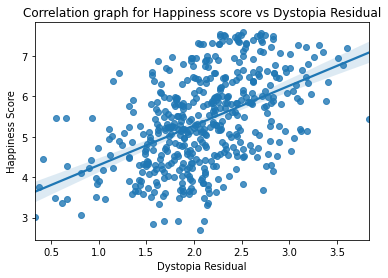

In [29]:
sns.regplot(data = dys_corr, x = 'Dystopia Residual', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Dystopia Residual")

# Conclusion

The hapiness score is mainly explained by the correlations with `Economy` ($R^2 = 0.617$), `Health` ($R^2 = 0.559$), `Family` ($R^2 = 0.405$), `Freedom` ($R^2 = 0.314$) and `Dystopia residual` ($R^2 = 0.240$)

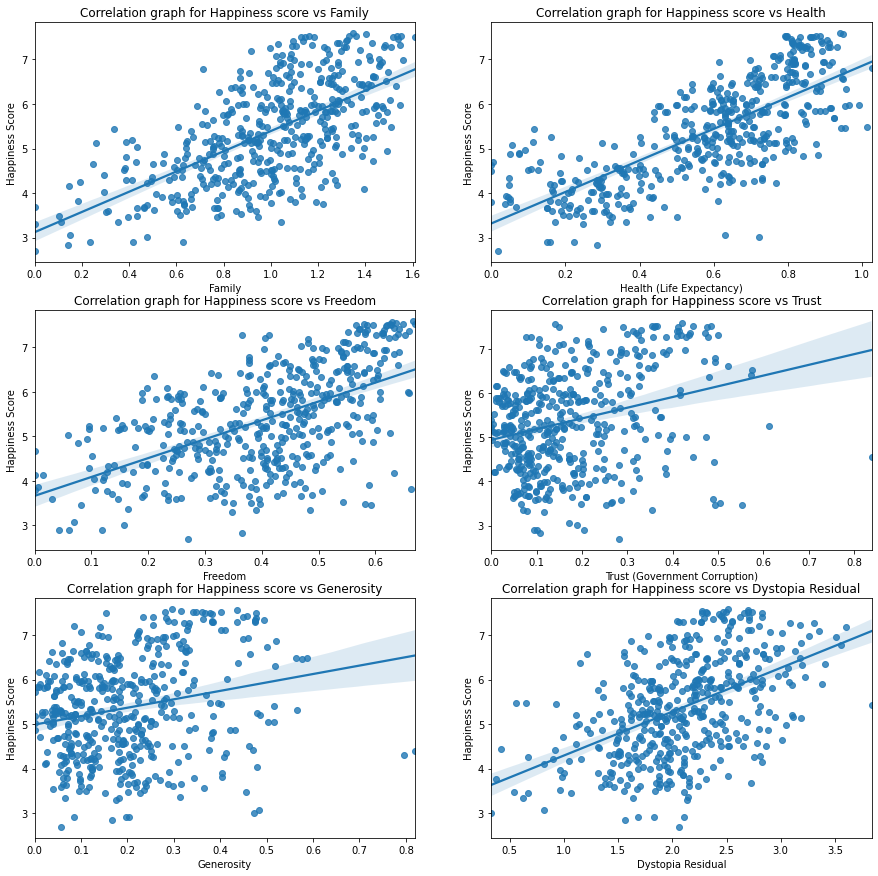

In [123]:
all_attributes = ['Happiness Score', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Economy (GDP per Capita)']

all_attributes_df = data[all_attributes]

f, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplot(3,2,1)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Family').set_title("Correlation graph for Happiness score vs Family")
plt.subplot(3,2,2)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Health (Life Expectancy)').set_title("Correlation graph for Happiness score vs Health")
plt.subplot(3,2,3)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Freedom').set_title("Correlation graph for Happiness score vs Freedom")
plt.subplot(3,2,4)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Trust (Government Corruption)').set_title("Correlation graph for Happiness score vs Trust")
plt.subplot(3,2,5)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Generosity').set_title("Correlation graph for Happiness score vs Generosity")
plt.subplot(3,2,6)
sns.regplot(data = all_attributes_df, y = 'Happiness Score', x = 'Dystopia Residual').set_title("Correlation graph for Happiness score vs Dystopia Residual")
plt.show()